In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df1 = pd.read_csv('C:\chatbot data\dataset.csv')

In [3]:
df1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = pd.read_csv('C:\chatbot data\symptom_Description.csv')

In [5]:
df2.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [6]:
df3 = pd.read_csv('C:\chatbot data\symptom_precaution.csv')

In [7]:
df3.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


# merging all files in 1 csv

In [8]:
merged_df = pd.merge(df1, df2, on='Disease')


In [9]:
merged_df.to_csv('merged.csv', index=False)

In [10]:
merged_df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."


In [11]:
merged_df.tail()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description
4555,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...
4559,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...


In [12]:
df = pd.merge(merged_df, df3, on='Disease')


In [13]:
df.to_csv('merged2.csv', index=False)

In [14]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


# Data Preprocessing

In [15]:
df.columns


Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4'],
      dtype='object')

In [16]:
df.isnull().sum()


Disease            0
Symptom_1          0
Symptom_2          0
Symptom_3          0
Symptom_4        348
Symptom_5       1128
Symptom_6       1746
Symptom_7       2412
Symptom_8       2736
Symptom_9       2988
Symptom_10      3120
Symptom_11      3366
Symptom_12      3816
Symptom_13      4056
Symptom_14      4254
Symptom_15      4320
Symptom_16      4368
Symptom_17      4488
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3     120
Precaution_4     120
dtype: int64

In [17]:
symptoms = df.columns[1:18]
symptoms

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

In [18]:
Precautions = df.columns[19:]
Precautions

Index(['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4'], dtype='object')

In [19]:
#merge all percautions in a one column
df['percaution'] = df.apply(lambda row: ','.join(row[Precautions].dropna()), axis=1)

In [20]:
# merge all of the symptoms in a one column
df['All_Symptoms'] = df.apply(lambda row: ','.join(row[symptoms].dropna()), axis=1)

In [21]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4,percaution,All_Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice,use detol or neem in bathing water,...","itching, skin_rash, nodal_skin_eruptions, disc..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice,use detol or neem in bathing water,...","skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice,use detol or neem in bathing water,...","itching, nodal_skin_eruptions, dischromic _pat..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice,use detol or neem in bathing water,...","itching, skin_rash, dischromic _patches"
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice,use detol or neem in bathing water,...","itching, skin_rash, nodal_skin_eruptions"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4556,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4557,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4558,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Impetigo (im-puh-TIE-go) is a common and highl...,soak affected area in warm water,use antibiotics,remove scabs with wet compressed cloth,consult doctor,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."


In [22]:
# dropping symptoms columns 
df.drop(symptoms, axis=1, inplace=True)



In [23]:
# dropping percautions columns 
df.drop(Precautions, axis=1, inplace=True)

In [24]:
df

,Disease,Description,percaution,All_Symptoms
0,Fungal infection,"In humans, fungal infections occur when an inv...","bath twice,use detol or neem in bathing water,...","itching, skin_rash, nodal_skin_eruptions, disc..."
1,Fungal infection,"In humans, fungal infections occur when an inv...","bath twice,use detol or neem in bathing water,...","skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"In humans, fungal infections occur when an inv...","bath twice,use detol or neem in bathing water,...","itching, nodal_skin_eruptions, dischromic _pat..."
3,Fungal infection,"In humans, fungal infections occur when an inv...","bath twice,use detol or neem in bathing water,...","itching, skin_rash, dischromic _patches"
4,Fungal infection,"In humans, fungal infections occur when an inv...","bath twice,use detol or neem in bathing water,...","itching, skin_rash, nodal_skin_eruptions"
...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"soak affected area in warm water,use antibioti...","skin_rash, high_fever, blister, red_sore_arou..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4560 non-null   object
 1   Description   4560 non-null   object
 2   percaution    4560 non-null   object
 3   All_Symptoms  4560 non-null   object
dtypes: object(4)
memory usage: 142.6+ KB


# now we don't have any NaN values but we need to Modify some words to make them understandable to the human mind

In [26]:
def words(x):
    return "you need to " + x

In [27]:
df.percaution = df.percaution.apply(words)


In [28]:
df

,Disease,Description,percaution,All_Symptoms
0,Fungal infection,"In humans, fungal infections occur when an inv...","you need to bath twice,use detol or neem in ba...","itching, skin_rash, nodal_skin_eruptions, disc..."
1,Fungal infection,"In humans, fungal infections occur when an inv...","you need to bath twice,use detol or neem in ba...","skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"In humans, fungal infections occur when an inv...","you need to bath twice,use detol or neem in ba...","itching, nodal_skin_eruptions, dischromic _pat..."
3,Fungal infection,"In humans, fungal infections occur when an inv...","you need to bath twice,use detol or neem in ba...","itching, skin_rash, dischromic _patches"
4,Fungal infection,"In humans, fungal infections occur when an inv...","you need to bath twice,use detol or neem in ba...","itching, skin_rash, nodal_skin_eruptions"
...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"you need to soak affected area in warm water,u...","skin_rash, high_fever, blister, red_sore_arou..."
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"you need to soak affected area in warm water,u...","skin_rash, high_fever, blister, red_sore_arou..."
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"you need to soak affected area in warm water,u...","skin_rash, high_fever, blister, red_sore_arou..."
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,"you need to soak affected area in warm water,u...","skin_rash, high_fever, blister, red_sore_arou..."


In [29]:
df.percaution = df.percaution.str.replace(',', ' ')


In [30]:
df.All_Symptoms = df.All_Symptoms.str.replace('_', ' ')


In [31]:
df

,Disease,Description,percaution,All_Symptoms
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, nodal skin eruptions, disc..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"skin rash, nodal skin eruptions, dischromic ..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, nodal skin eruptions, dischromic pat..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, dischromic patches"
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, nodal skin eruptions"
...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou..."
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou..."
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou..."
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou..."


In [32]:
df["final"] = df.Description.str.cat(df.percaution, sep = ',')

In [33]:
df

,Disease,Description,percaution,All_Symptoms,final
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, nodal skin eruptions, disc...","In humans, fungal infections occur when an inv..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"skin rash, nodal skin eruptions, dischromic ...","In humans, fungal infections occur when an inv..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, nodal skin eruptions, dischromic pat...","In humans, fungal infections occur when an inv..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, dischromic patches","In humans, fungal infections occur when an inv..."
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching, skin rash, nodal skin eruptions","In humans, fungal infections occur when an inv..."
...,...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin rash, high fever, blister, red sore arou...",Impetigo (im-puh-TIE-go) is a common and highl...


In [34]:
df.final[1250]

'Cervical spondylosis is a general term for age-related wear and tear affecting the spinal disks in your neck. As the disks dehydrate and shrink, signs of osteoarthritis develop, including bony projections along the edges of bones (bone spurs).,you need to use heating pad or cold pack exercise take otc pain reliver consult doctor'

# NLP

In [35]:
df.All_Symptoms = df.All_Symptoms.str.replace(" ", ",")


In [36]:
df

,Disease,Description,percaution,All_Symptoms,final
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,,skin,rash,,nodal,skin,eruptions,,disc...","In humans, fungal infections occur when an inv..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,",skin,rash,,nodal,skin,eruptions,,dischromic,,...","In humans, fungal infections occur when an inv..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,,nodal,skin,eruptions,,dischromic,,pat...","In humans, fungal infections occur when an inv..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,,skin,rash,,dischromic,,patches","In humans, fungal infections occur when an inv..."
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,,skin,rash,,nodal,skin,eruptions","In humans, fungal infections occur when an inv..."
...,...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,,high,fever,,blister,,red,sore,arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,,high,fever,,blister,,red,sore,arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,,high,fever,,blister,,red,sore,arou...",Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,,high,fever,,blister,,red,sore,arou...",Impetigo (im-puh-TIE-go) is a common and highl...


In [37]:
df.All_Symptoms = df.All_Symptoms.str.replace(",,", ",")


In [38]:
df

,Disease,Description,percaution,All_Symptoms,final
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,nodal,skin,eruptions,dischro...","In humans, fungal infections occur when an inv..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,",skin,rash,nodal,skin,eruptions,dischromic,pat...","In humans, fungal infections occur when an inv..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,nodal,skin,eruptions,dischromic,patches","In humans, fungal infections occur when an inv..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,dischromic,patches","In humans, fungal infections occur when an inv..."
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,nodal,skin,eruptions","In humans, fungal infections occur when an inv..."
...,...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,high,fever,blister,red,sore,around,...",Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,high,fever,blister,red,sore,around,...",Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,high,fever,blister,red,sore,around,...",Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,",skin,rash,high,fever,blister,red,sore,around,...",Impetigo (im-puh-TIE-go) is a common and highl...


In [39]:
df["All_Symptoms"] = df["All_Symptoms"].str.lstrip(',')


In [40]:
df

,Disease,Description,percaution,All_Symptoms,final
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,nodal,skin,eruptions,dischro...","In humans, fungal infections occur when an inv..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"skin,rash,nodal,skin,eruptions,dischromic,patches","In humans, fungal infections occur when an inv..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,nodal,skin,eruptions,dischromic,patches","In humans, fungal infections occur when an inv..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,dischromic,patches","In humans, fungal infections occur when an inv..."
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,"itching,skin,rash,nodal,skin,eruptions","In humans, fungal infections occur when an inv..."
...,...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin,rash,high,fever,blister,red,sore,around,n...",Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin,rash,high,fever,blister,red,sore,around,n...",Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin,rash,high,fever,blister,red,sore,around,n...",Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,"skin,rash,high,fever,blister,red,sore,around,n...",Impetigo (im-puh-TIE-go) is a common and highl...


In [41]:
df.All_Symptoms = df.All_Symptoms.str.replace(',', ' ')


In [42]:
df

,Disease,Description,percaution,All_Symptoms,final
0,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,itching skin rash nodal skin eruptions dischro...,"In humans, fungal infections occur when an inv..."
1,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,skin rash nodal skin eruptions dischromic patches,"In humans, fungal infections occur when an inv..."
2,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,itching nodal skin eruptions dischromic patches,"In humans, fungal infections occur when an inv..."
3,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,itching skin rash dischromic patches,"In humans, fungal infections occur when an inv..."
4,Fungal infection,"In humans, fungal infections occur when an inv...",you need to bath twice use detol or neem in ba...,itching skin rash nodal skin eruptions,"In humans, fungal infections occur when an inv..."
...,...,...,...,...,...
4555,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,skin rash high fever blister red sore around n...,Impetigo (im-puh-TIE-go) is a common and highl...
4556,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,skin rash high fever blister red sore around n...,Impetigo (im-puh-TIE-go) is a common and highl...
4557,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,skin rash high fever blister red sore around n...,Impetigo (im-puh-TIE-go) is a common and highl...
4558,Impetigo,Impetigo (im-puh-TIE-go) is a common and highl...,you need to soak affected area in warm water u...,skin rash high fever blister red sore around n...,Impetigo (im-puh-TIE-go) is a common and highl...


In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [44]:
dataframe = df.copy()


In [45]:
tokenizer = RegexpTokenizer(r'\w+')

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
lemmatizer = WordNetLemmatizer()


In [48]:
def final(text) :
    text=text.lower()
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [49]:
a = "Vomiting, breathlessness, sweating"

In [50]:
final(a)

'vomiting breathlessness sweating'

# count vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words="english")

In [52]:
vectors = cv.fit_transform(dataframe["All_Symptoms"])

In [53]:
feature_names = cv.get_feature_names_out()


In [54]:
feature_names

array(['abdomen', 'abdominal', 'abnormal', 'acidity', 'acute', 'alcohol',
       'altered', 'anxiety', 'appetite', 'balance', 'belly', 'blackheads',
       'bladder', 'bleeding', 'blister', 'blood', 'blurred', 'body',
       'breathlessness', 'brittle', 'bruising', 'burning', 'calf',
       'chest', 'chills', 'cold', 'coma', 'congestion', 'constipation',
       'consumption', 'contacts', 'continuous', 'cough', 'cramps',
       'crust', 'dark', 'dehydration', 'dents', 'depression', 'diarrhoea',
       'dischromic', 'discomfort', 'distention', 'distorted',
       'disturbances', 'dizziness', 'drying', 'dusting', 'enlarged',
       'eruptions', 'excessive', 'extra', 'extremeties', 'eyes', 'face',
       'failure', 'family', 'fast', 'fatigue', 'feel', 'feets', 'fever',
       'filled', 'fluid', 'foul', 'gain', 'gases', 'hands', 'headache',
       'heart', 'high', 'hip', 'history', 'hunger', 'indigestion',
       'inflammatory', 'injections', 'internal', 'irritability',
       'irritation',

In [55]:
len(feature_names)

182

In [56]:
vectors.shape

(4560, 182)

In [57]:
X = cv.fit_transform(dataframe['final'])
y = dataframe['Disease']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [60]:
# Step 7: Predict and evaluate the model
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
#Calculating Details
print('MultinomialNBModel Train Score is : ' , mnb.score(X_train, y_train))
print('MultinomialNBModel Test Score is : ' , mnb.score(X_test, y_test))

MultinomialNBModel Train Score is :  1.0
MultinomialNBModel Test Score is :  1.0


In [62]:
print(f'MultinomialNBModel Accuracy: {accuracy:.2f}')

MultinomialNBModel Accuracy: 1.00


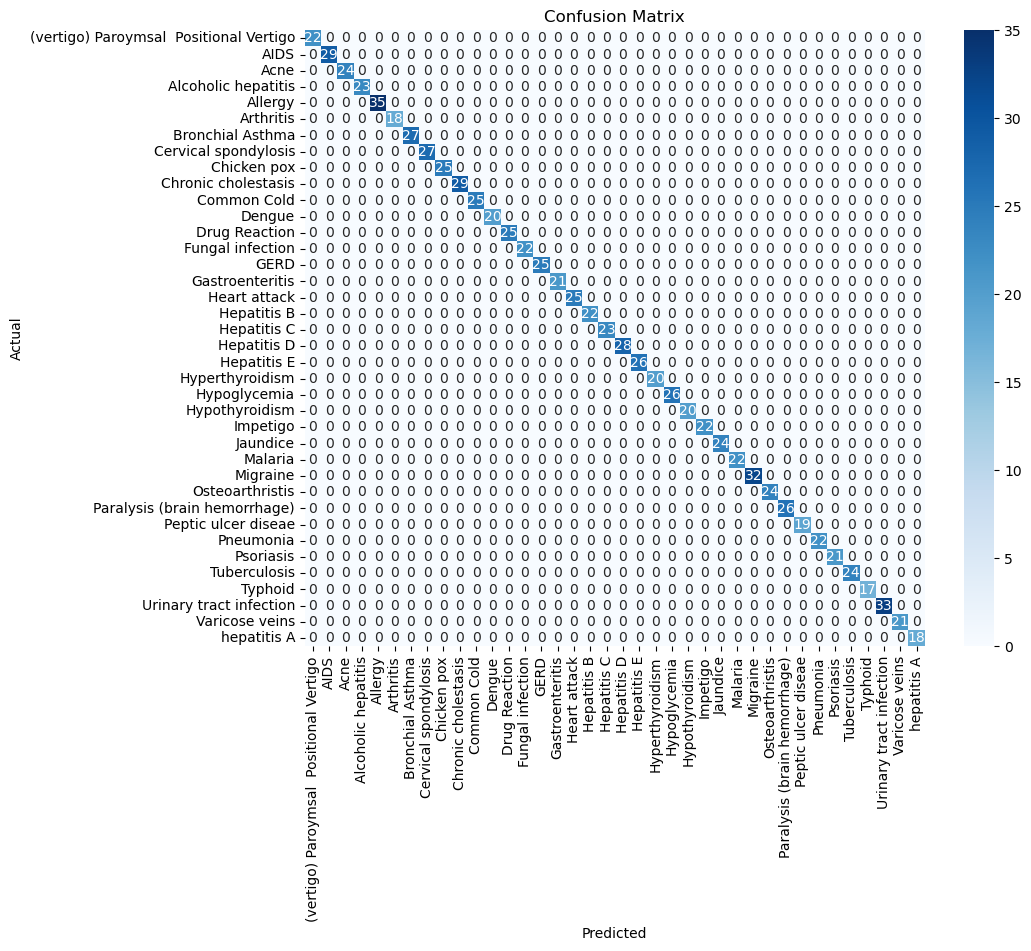

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
from sklearn.svm import SVC

In [65]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

SVCModel Train Score is :  1.0
SVCModel Test Score is :  1.0


In [66]:
y_pred2 = SVCModel.predict(X_test)

In [67]:
SVCaccuracy = accuracy_score(y_test, y_pred2)

In [68]:
print(f'SVC Accuracy: {SVCaccuracy:.2f}')

SVC Accuracy: 1.00


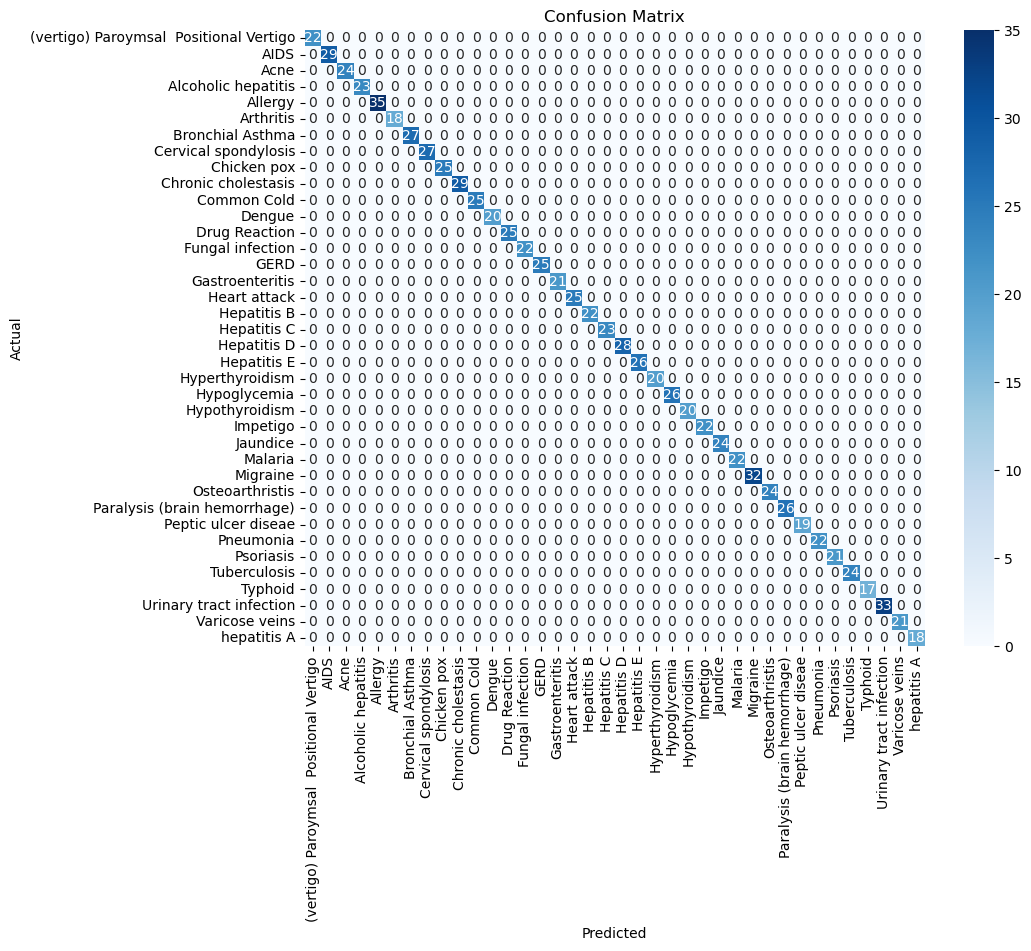

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=SVCModel.classes_, yticklabels=SVCModel.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
def nlp_model(x):
    Symptoms = final(x)
    SymptomVector = cv.transform([Symptoms])
    result = mnb.predict(SymptomVector)
    print("We found that you are suffering from: ")
    print(result[0])
    inp = input("👉Do you want to know anything about any disease (yes/no): ")
    if inp.lower() == "yes":
        dis = input("Enter the disease: ")
        print("👉Your entered disease: ", dis)
        mat = dataframe[dataframe["Disease"] == dis]
        print("👉You may have suffered from the following symptoms: ")
        sym = mat.All_Symptoms.values[0]
        print(sym)
        print("👉The diagnosis of your disease is - ")
        dia = mat.final.values[0]
        print(dia)
    else:
        print("Thank you! Visit Again.")

In [ ]:
sam = "I've been experiencing a sudden high fever, severe headache, muscle aches, fatigue, and a sore throat. I've also noticed a red rash spreading across my body. What could be causing all of this? "
nlp_model(sam)

We found that you are suffering from: 
Typhoid
